# Forearm Pulse Analysis

### Objective: 
Use the Biosignal Processing in Python to filter then analyze the following experimental data. 

Hypothesis: The counts of onset of activity will be similar between the needle electrode and the surface channels nearest the needle electrode or on top of the activating muscle. For example: 
* During pink activation, its needle electrode nDQ (N1) will have high onset counts in that needle electrode, as well as surface channels 3 and 4 which lie on the muscle. 
* During middle finger activation, its needle electrode nDC (N2) will have high onset counts in that electrode as well as surface channels 1, 5 and 6. 

### Experiment Summary: 
* Conducted on March 18, 2020. 
* Biopac, 2 Needle Electrodes tested separately due to 1 channel capacity. Sampling frequency 4000 Hz.
* Electrodes were separated center-center 3 cm width, 2 cm height.
* First Insertion site was used with Ex. Digiti Quinti (N1) and with Ex. Digitorum Communis (N2). No complications to report.
* Skin prep was done with alcohol wipes and Nuprep exfoliating gel. Electrode locations were marked with Surgical Marker.
* Tasks involved sharp isolated finger extensions, slow isolated finger extensions, fast (half-time) isolated finger tapping, and hand extension/flexion contractions.
* Experiment done by Gladys Ornelas with help from Research Assistants Xiaoyi Ma and Ruby Rios Ramirez.


<img src="Experiment_Hypothesis.png" width=1000 height=600 />

### Importing Necessary Modules 

In [1]:
import pickle
import numpy as np
import pylab as plt
from biosppy.signals import emg
import matplotlib as matplotlib
import matplotlib.animation as animation
import onsets_plots

%matplotlib inline

### Loading the Needle and Surface Data Files 

In [2]:
needle_data_file = 'E:/PhD_SSD/Python Data Anlaysis/Invasive/Biopac/NIsoF_20200318.pickle'
pickle_in1 = open(needle_data_file,"rb")
N_Data = pickle.load(pickle_in1)
fs1 = 4000
print(N_Data.shape)

(4, 920000)


In [3]:
surface_data_file = 'E:/PhD_SSD/Python Data Anlaysis/Invasive/Biopac/SIsoF_20200318.pickle'
pickle_in1 = open(surface_data_file,"rb")
SIsoF_Data = pickle.load(pickle_in1)
fs2 = 250 
print(SIsoF_Data.shape)

(4, 8, 58000)


### Analysis 

#### Processing the signals

In [4]:
# Filtering with BioSPPy
# Processing Digiti Quinti
DQ_out = emg.emg(signal=N_Data[0,:], sampling_rate=fs1, show=False) 

# Processing Digitorum Communis
DC_out = emg.emg(signal=N_Data[1,:], sampling_rate=fs1, show=False) 

# Processing Surface Data during Digiti Quinti recording.
S_out = {}
for i in range(8):
    S_out['Ch'+str(i)] = emg.emg(signal=SIsoF_Data[0,i,:], sampling_rate=fs2, show=False) 
    
# Processing Surface Data during Digitorum Communis recording.
S_out2 = {}
fs2 = 250 
for i in range(8):
    S_out2['Ch'+str(i)] = emg.emg(signal=SIsoF_Data[1,i,:], sampling_rate=fs2, show=False) 

In [5]:
# Establishing the variables for the tasks that will be used to isolate the epochs of interest
int_chk = [(0,10),(20,30),(40,50),(60,70),(80,90),(100,110),(120,130),(140,150),(160,170),(180,190),(200,210),(220,230)]

In [6]:
## Getting the number of onsets for Digiti Quinti 
DQ_onset_cts = onsets_plots.get_needle_onset_cts(DQ_out, fs1, int_chk)

## Getting the number of onsets for Digitorum Communis
DC_onset_cts = onsets_plots.get_needle_onset_cts(DC_out, fs1, int_chk)   

## Getting the number of onsets at surface electrodes duirng Digiti Quinti recording
S_onset_cts = onsets_plots.get_surface_onset_cts(S_out, fs2, int_chk)

## Getting the number of onsets at surface electrodes duirng Digitorum Communis recording
S_onset_cts2 = onsets_plots.get_surface_onset_cts(S_out2, fs2, int_chk)

#### Calculating the Averaged Pulse Counts per surface channel of both surface recordings

In [7]:
S_onset_avg = np.zeros((2,8,4))
pairs = [(0,3),(3,6), (6,9), (9,12)]

for i in range(8):
    for j in range(4): 
        st = pairs[j][0]
        sp = pairs[j][1]
        S_onset_avg[0,i,j] = np.mean(S_onset_cts['Ch'+str(i)][st:sp])
        S_onset_avg[1,i,j] = np.mean(S_onset_cts2['Ch'+str(i)][st:sp])
        
S_on_allavg = np.mean(S_onset_avg,axis = 0)

#### Plotting the average counts as a bar plot and energy map

In [8]:
# Establishing plotting variables 
clr = [0,1,2,3,4,5,6,8] # color for the surface channels
x_axis = np.arange(1,11) # Tick numbering 
labels = ['nDQ', 'nDC', 'ch1','ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8'] # tick labels 
rotation = 30 # tick rotation 

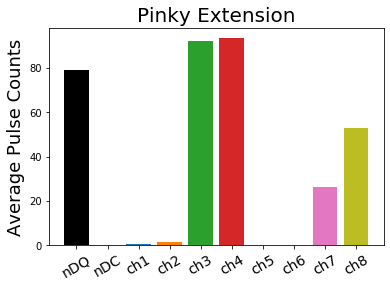

In [9]:
# Generating plot during pinky extension task
title = "Pinky Extension"
n_task1 = 0 
n_task2= 3 
s_task= 0 
onsets_plots.generate_bar_plot_tasks(n_task1,n_task2, s_task, DQ_onset_cts, DC_onset_cts, S_on_allavg, clr, title, x_axis, labels, rotation)

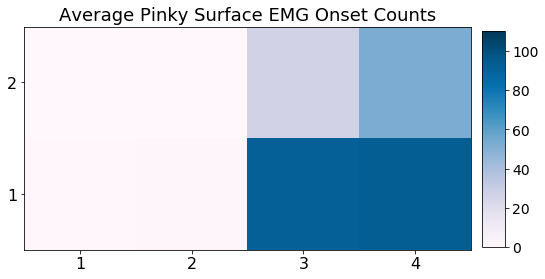

In [10]:
task = 0 
title = "Average Pinky Surface EMG Onset Counts"
onsets_plots.generate_surface_heat_map(S_on_allavg, task, title)

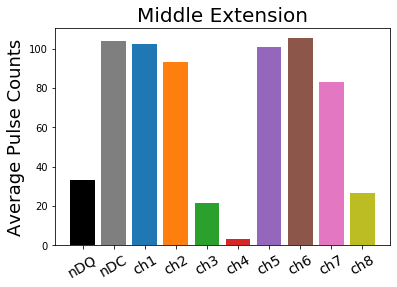

In [11]:
# Generating plot during middle extension task 
title = "Middle Extension"
n_task1 = 3 
n_task2= 6 
s_task= 1 
onsets_plots.generate_bar_plot_tasks(n_task1,n_task2, s_task, DQ_onset_cts, DC_onset_cts, S_on_allavg, clr, title, x_axis, labels, rotation)

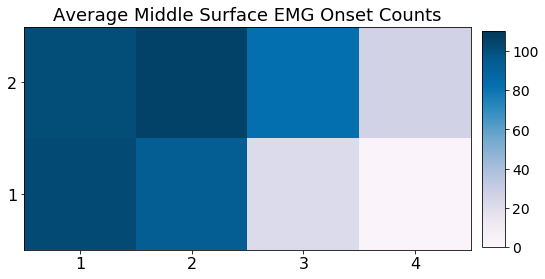

In [12]:
task = 1 
title = "Average Middle Surface EMG Onset Counts"
onsets_plots.generate_surface_heat_map(S_on_allavg, task, title)

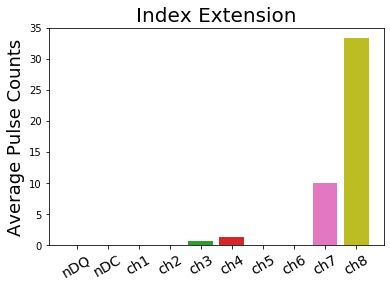

In [13]:
# Generating plot during index extension task 
title = "Index Extension"
n_task1 = 6 
n_task2= 9 
s_task= 2 
onsets_plots.generate_bar_plot_tasks(n_task1,n_task2, s_task, DQ_onset_cts, DC_onset_cts, S_on_allavg, clr, title, x_axis, labels, rotation)

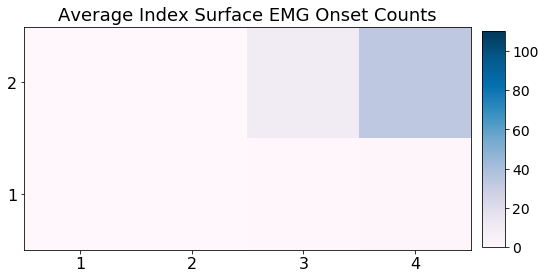

In [14]:
task = 2 
title = "Average Index Surface EMG Onset Counts"
onsets_plots.generate_surface_heat_map(S_on_allavg, task, title)

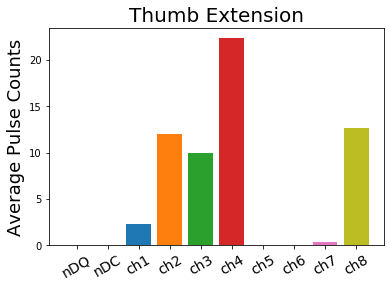

In [15]:
# Generating plot during thumb extension task 
title = "Thumb Extension"
n_task1 = 9 
n_task2= 12 
s_task= 3 
onsets_plots.generate_bar_plot_tasks(n_task1,n_task2, s_task, DQ_onset_cts, DC_onset_cts, S_on_allavg, clr, title, x_axis, labels, rotation)

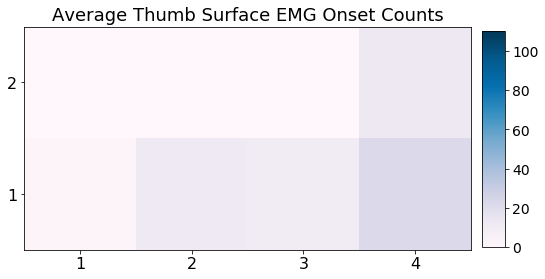

In [16]:
task = 3
title = "Average Thumb Surface EMG Onset Counts"
onsets_plots.generate_surface_heat_map(S_on_allavg, task, title)